In [1]:
import os

# Create project folders automatically
os.makedirs("data", exist_ok=True)
os.makedirs("model", exist_ok=True)
os.makedirs("app", exist_ok=True)
os.makedirs("screenshots", exist_ok=True)
os.makedirs("report", exist_ok=True)

print("✅ Project folders created successfully!")
print("✅ Current folder contains:", os.listdir())


✅ Project folders created successfully!
✅ Current folder contains: ['app', 'data', 'disease_project.ipynb', 'model', 'report', 'screenshots']


In [2]:
import os
print("✅ Current Working Directory:", os.getcwd())
print("✅ Files/Folders:", os.listdir())


✅ Current Working Directory: c:\Users\Vedant\OneDrive\Desktop\disease prediction
✅ Files/Folders: ['app', 'data', 'disease_project.ipynb', 'model', 'report', 'screenshots']


In [3]:
import os
print("✅ Files in data folder:", os.listdir("data"))


✅ Files in data folder: ['diabetes.csv']


In [4]:
import pandas as pd

df = pd.read_csv("data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print("✅ Dataset Shape:", df.shape)
df.info()


✅ Dataset Shape: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

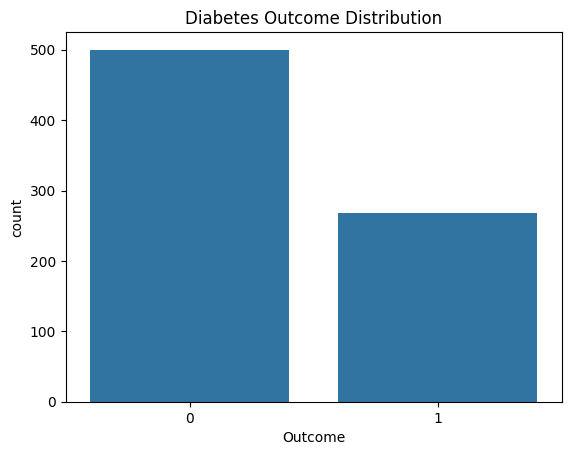

Outcome
0    500
1    268
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Outcome", data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()

print(df["Outcome"].value_counts())


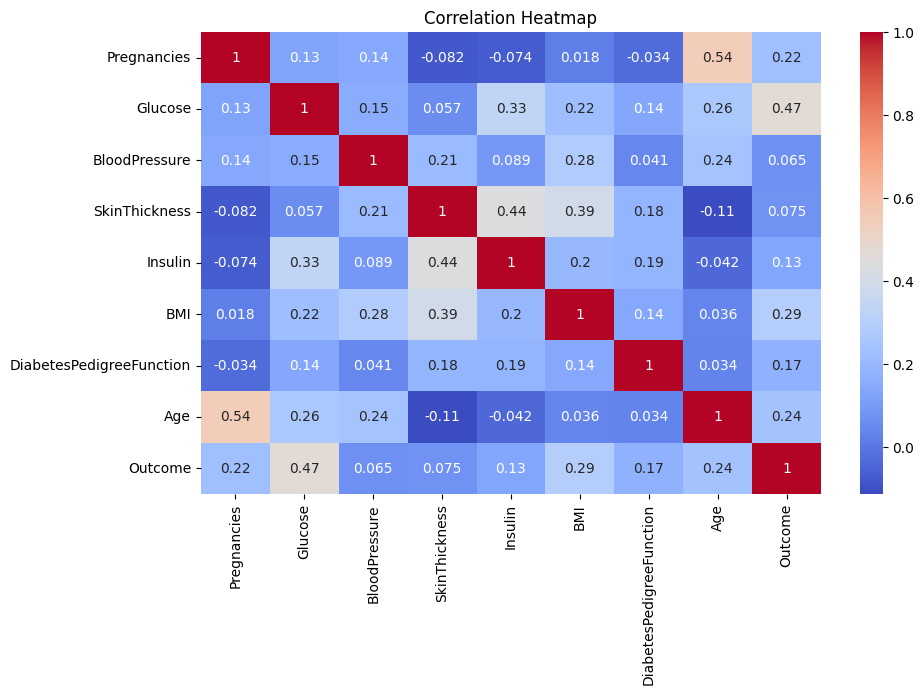

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


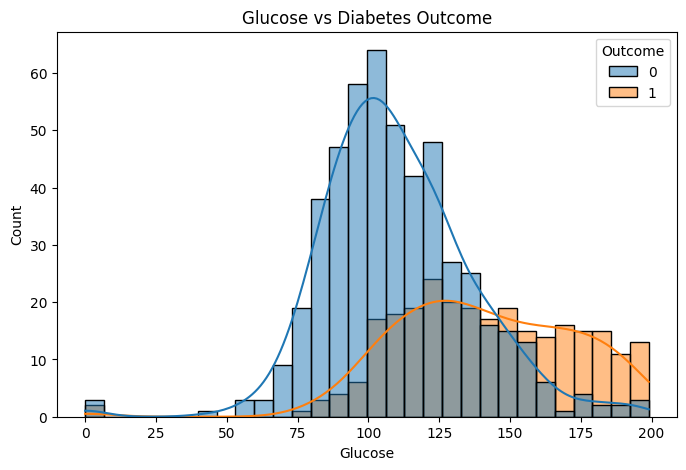

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="Glucose", hue="Outcome", bins=30, kde=True)
plt.title("Glucose vs Diabetes Outcome")
plt.show()


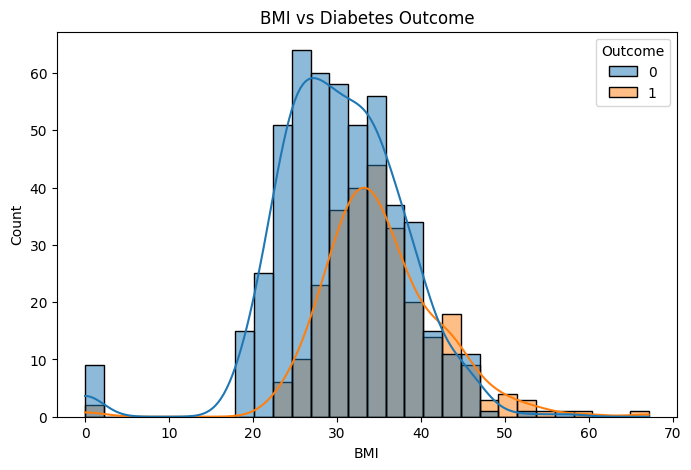

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="BMI", hue="Outcome", bins=30, kde=True)
plt.title("BMI vs Diabetes Outcome")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Train Shape:", X_train.shape)
print("✅ Test Shape:", X_test.shape)


✅ Train Shape: (614, 8)
✅ Test Shape: (154, 8)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Normalization Completed")


✅ Normalization Completed


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

print("✅ Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))


✅ Logistic Regression Results
Accuracy: 0.7142857142857143
Recall: 0.5185185185185185
ROC-AUC: 0.8229629629629629


In [14]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("✅ Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


NameError: name 'y_pred_rf' is not defined

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("✅ Random Forest Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


✅ Random Forest Results
Accuracy: 0.7467532467532467
Recall: 0.5925925925925926
ROC-AUC: 0.8133333333333334


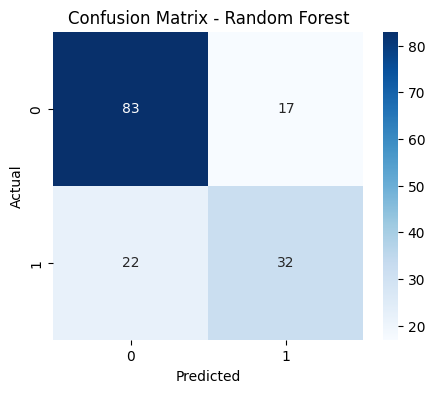

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



In [16]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_test, y_pred_rf))


In [17]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
1,Glucose,0.266073
5,BMI,0.161420
7,Age,0.130861
6,DiabetesPedigreeFunction,0.127089
2,BloodPressure,0.086335
0,Pregnancies,0.084277
4,Insulin,0.073752
3,SkinThickness,0.070194


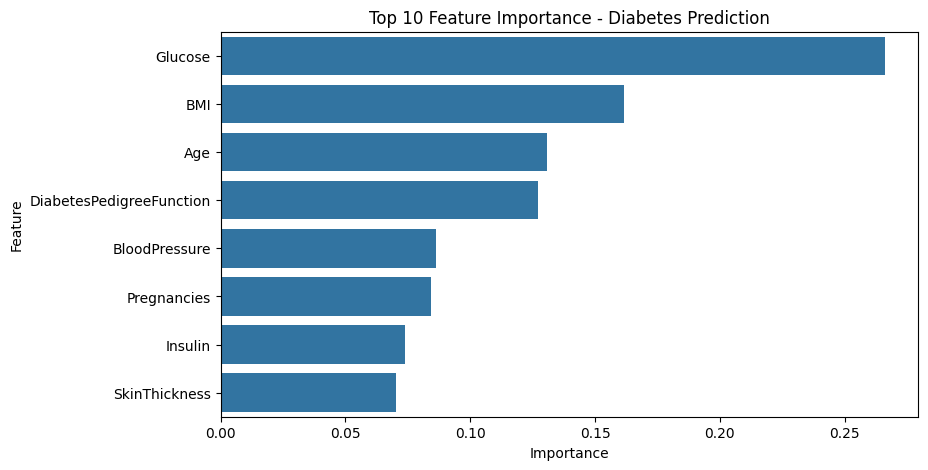

In [18]:
plt.figure(figsize=(9,5))
sns.barplot(data=feature_importance.head(10), x="Importance", y="Feature")
plt.title("Top 10 Feature Importance - Diabetes Prediction")
plt.show()


In [19]:
import joblib

joblib.dump(rf, "model/diabetes_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
joblib.dump(X.columns.tolist(), "model/training_columns.pkl")

print("✅ Model saved successfully!")
print("✅ Model folder contains:", os.listdir("model"))


✅ Model saved successfully!
✅ Model folder contains: ['diabetes_model.pkl', 'scaler.pkl', 'training_columns.pkl']
